In [14]:
import pandas as pd

import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
import matplotlib.font_manager as fm
import os
from highlight_text import fig_text, ax_text

from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import urllib

In [15]:
font_path = "../assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if (y.split(".")[-1] == "ttf") or (y.split(".")[-1] == "otf"):
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

plt.style.use("soc_base.mplstyle")

In [6]:
df = pd.read_csv('../data/shots.csv')

In [7]:
df

,minute,second,x,y,expandedMinute,period,type,playerId,blockedX,blockedY,...,goalMouthY,cumulative_mins,teamName,oppositionTeamName,shirtNo,name,position,shortName,penalty,xG
0,6,24,66.255,37.740,6,FirstHalf,MissedShots,494186,NaN,NaN,...,27.200,6.400000,Manchester City Women,Arsenal Women,6,Vivianne Miedema,MC,V. Miedema,NaN,0.02
1,20,23,74.970,39.100,20,FirstHalf,SavedShot,460953,98.8,50.9,...,32.164,20.383333,Manchester City Women,Arsenal Women,11,Lauren Hemp,FWL,L. Hemp,NaN,0.03
2,23,16,94.710,29.648,23,FirstHalf,SavedShot,461084,93.7,45.8,...,33.932,23.266667,Manchester City Women,Arsenal Women,20,Aoba Fujino,FWR,A. Fujino,NaN,0.18
3,41,31,88.725,42.840,41,FirstHalf,Goal,494186,NaN,NaN,...,35.292,41.516667,Manchester City Women,Arsenal Women,6,Vivianne Miedema,MC,V. Miedema,NaN,0.10
4,57,49,85.260,33.184,61,SecondHalf,Goal,460974,NaN,NaN,...,36.652,60.866667,Manchester City Women,Arsenal Women,16,Jessica Park,MC,J. Park,NaN,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,74,42,81.900,21.488,84,SecondHalf,MissedShots,460818,90.1,50.9,...,47.192,84.233333,Manchester City Women,Brighton & Hove Albion Women,14,Kerolin,Sub,Kerolin,NaN,0.02
291,77,4,95.970,32.300,87,SecondHalf,SavedShot,494186,98.8,48.6,...,34.136,86.600000,Manchester City Women,Brighton & Hove Albion Women,6,Vivianne Miedema,Sub,V. Miedema,NaN,0.13
292,85,39,78.540,28.696,95,SecondHalf,SavedShot,461168,98.4,49.5,...,34.204,95.183333,Manchester City Women,Brighton & Hove Albion Women,10,Jill Roord,Sub,J. Roord,NaN,0.03
293,86,16,88.515,43.520,96,SecondHalf,MissedShots,460818,NaN,NaN,...,26.384,95.800000,Manchester City Women,Brighton & Hove Albion Women,14,Kerolin,Sub,Kerolin,NaN,0.06


In [24]:
#you can put any player you want here as long as they played for Manchester City Women in the 24/25 season
pname = "Mary Fowler"
df = df.loc[(df['name'] == pname) & (df['penalty'] != True)]

In [9]:
total_shots = df.shape[0]
total_goals = df[df['type'] == 'Goal'].shape[0]
total_xG = df['xG'].sum()
xG_per_shot = total_xG / total_shots
points_average_distance = df['x'].mean()
actual_average_distance = 105 - (df['x']/1.05).mean()
print(points_average_distance, actual_average_distance)

90.42326086956523 18.882608695652166


In [17]:
background_color='#EFE9E6'

In [18]:
pitch = VerticalPitch(
    pitch_type='uefa',
    half=True,
    pitch_color=background_color,
    pad_bottom=.5,
    line_color='#1C2C5B',
    linewidth=.75,
    axis=True, label=True
)

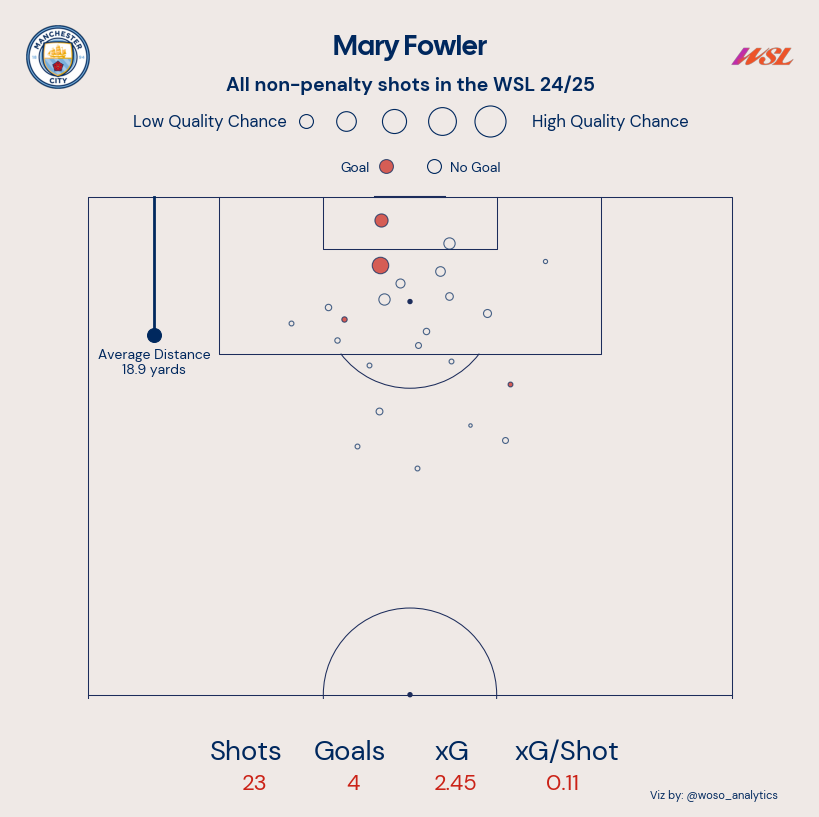

In [23]:
# create a subplot with 2 rows and 1 column
fig = plt.figure(figsize=(8, 12))
fig.patch.set_facecolor(background_color)
plt.rcParams['font.family'] = 'DM Sans'

# Top row for the team names and score
# [left, bottom, width, height]

ax1 = fig.add_axes([0, 0.7, 1, .15])
ax1.set_facecolor(background_color)
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)


ax1.text(
    x=0.5,
    y=.75,
    s=f'{pname}',
    fontsize=20,
#     fontproperties=font_props,
    fontweight='bold',
    color='#00285E',
    ha='center',
    family='Cal Sans'
)
ax1.text(
    x=0.5,
    y=.55,
    s=f'All non-penalty shots in the WSL 24/25',
    fontsize=14,
    fontweight='bold',
#     fontproperties=font_props,
    color='#00285E',
    ha='center'
)
ax1.text(
    x=0.25,
    y=0.35,
    s=f'Low Quality Chance',
    fontsize=12,
#     fontproperties=font_props,
    color='#00285E',
    ha='center'
)

# add a scatter point between the two texts
ax1.scatter(
    x=0.37,
    y=0.38,
    s=100,
    color=background_color,
    edgecolor='#00285E',
    linewidth=.8
)
ax1.scatter(
    x=0.42,
    y=0.38,
    s=200,
    color=background_color,
    edgecolor='#00285E',
    linewidth=.8
)
ax1.scatter(
    x=0.48,
    y=0.38,
    s=300,
    color=background_color,
    edgecolor='#00285E',
    linewidth=.8
)
ax1.scatter(
    x=0.54,
    y=0.38,
    s=400,
    color=background_color,
    edgecolor='#00285E',
    linewidth=.8
)
ax1.scatter(
    x=0.6,
    y=0.38,
    s=500,
    color=background_color,
    edgecolor='#00285E',
    linewidth=.8
)

ax1.text(
    x=0.75,
    y=0.35,
    s=f'High Quality Chance',
    fontsize=12,
#     fontproperties=font_props,
    color='#00285E',
    ha='center'
)


ax1.text(
    x=0.45,
    y=0.1,
    s=f'Goal',
    fontsize=10,
#     fontproperties=font_props,
    color='#00285E',
    ha='right'
)
ax1.scatter(
    x=0.47,
    y=0.13,
    s=100,
    color='#CB2217',
    edgecolor='#00285E',
    linewidth=.8,
    alpha=.7
)


ax1.scatter(
    x=0.53,
    y=0.13,
    s=100,
    color=background_color,
    edgecolor='#00285E',
    linewidth=.8
)

ax1.text(
    x=0.55,
    y=0.1,
    s=f'No Goal',
    fontsize=10,
#     fontproperties=font_props,
    color='#00285E',
    ha='left'
)

ax1.set_axis_off()


ax2 = fig.add_axes([.05, 0.25, .9, .5])
ax2.set_facecolor(background_color)

pitch.draw(ax=ax2)


# create a scatter plot at y 100 - average_distance
ax2.scatter(
    x=61,
    y=points_average_distance,
    s=100,
    color='#00285E',
    linewidth=.8
)
# create a line from the bottom of the pitch to the scatter point
ax2.plot(
    [61, 61],
    [105, points_average_distance],
    color='#00285E',
    linewidth=2
)

# Add a text label for the average distance
ax2.text(
    x=61,
    y=points_average_distance - 4,
    s=f'Average Distance\n{actual_average_distance:.1f} yards',
    fontsize=10,
#     fontproperties=font_props,
    color='#00285E',
    ha='center'
)


for x in df.to_dict(orient='records'):
    pitch.scatter(
        x['x'],
        x['y'],
        s=300 * x['xG'],
        color='#CB2217' if x['type'] == 'Goal' else background_color,
        ax=ax2,
        alpha=.7,
        linewidth=.8,
        edgecolor='#00285E'
    )

ax2.set_axis_off()

# add another axis for the stats
ax3 = fig.add_axes([0, .2, 1, .05])
ax3.set_facecolor(background_color)
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 1)

ax3.text(
    x=0.25,
    y=.5,
    s='Shots',
    fontsize=20,
    color='#00285E',
    ha='left'
)

ax3.text(
    x=0.29,
    y=0,
    s=f'{total_shots}',
    fontsize=16,
    color='#CB2217',
    ha='left'
)

ax3.text(
    x=0.38,
    y=.5,
    s='Goals',
    fontsize=20,
    color='#00285E',
    ha='left'
)

ax3.text(
    x=0.42,
    y=0,
    s=f'{total_goals}',
    fontsize=16,
    color='#CB2217',
    ha='left'
)

ax3.text(
    x=0.53,
    y=.5,
    s='xG',
    fontsize=20,
    color='#00285E',
    ha='left'
)

ax3.text(
    x=0.53,
    y=0,
    s=f'{total_xG:.2f}',
    fontsize=16,
    color='#CB2217',
    ha='left'
)

ax3.text(
    x=0.63,
    y=.5,
    s='xG/Shot',
    fontsize=20,
    color='#00285E',
    ha='left'
)

ax3.text(
    x=0.67,
    y=0,
    s=f'{xG_per_shot:.2f}',
    fontsize=16,
    color='#CB2217',
    ha='left'
)

ax3.set_axis_off()


fig_text(
    x = 0.8, y = 0.2,
    s = "Viz by: @woso_analytics",
    color = "#00285e",
    size = 8,
    annotationbbox_kw={"xycoords": "figure fraction"}
)

fotmob_url = 'https://images.fotmob.com/image_resources/logo/leaguelogo/9227.png'
club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}'))
ax_timage = add_image(club_icon, fig, left=0.9, bottom=0.77, width=0.08, height=0.08)

city_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/231488.png'
club_icon = Image.open(urllib.request.urlopen(f'{city_url}'))
ax_timage = add_image(club_icon, fig, left=0.02, bottom=0.77, width=0.08, height=0.08)


plt.savefig("../figures/mancity_shots.png", dpi=600, facecolor="#EFE9E6", bbox_inches="tight", transparent=False)
plt.savefig("../figures/mancity_shots_tr.png", dpi=600, facecolor="none", bbox_inches="tight", transparent=True)